# Applied Data Science
## Data transformation and integration
### Tom Diethe

In [1]:
PYTHON_VERSION = 3  ## change to 2 if using Python 2.x
DOWNLOAD_DATA = False  ## change to True if you do not have the csv files on your machine

In [2]:
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from time import sleep
%matplotlib inline

if PYTHON_VERSION == 2:
    from StringIO import StringIO    
    from urllib import urlopen
else:
    from io import BytesIO as StringIO
    from urllib.request import urlopen
    
sns.set_context("talk", font_scale=2, rc={"lines.linewidth": 4})

In [9]:
country = 'Country Name'
countries = ['United States', 'China', 'India', 'Ireland']

def get_worldbank_dataframe(indicator_id):
    
    if DOWNLOAD_DATA == True:
        url = urlopen('http://api.worldbank.org/v2/en/indicator/{0}?downloadformat=csv'.format(indicator_id))
        archive = ZipFile(StringIO(url.read()))
        print(archive.namelist())
        fname = [f for f in archive.namelist() if not f.startswith('Metadata')][0]
        data = StringIO(archive.read(fname))
    else:
        data = '{0}/{0}.csv'.format(indicator_id)
        
    return pd.read_csv(data, skiprows=4)

def rearrange_dataframe(df, indicator_name):
    years = [c for c in df.columns if c[0] == '1' or c[0] == '2']
    # print(years)
    indicator = 'Life expectancy at birth'

    df = pd.melt(df[[country] + years], id_vars=country, var_name='year')
    ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
    df.rename(columns={'value': indicator_name}, inplace=True)
    df.set_index(['year', country], inplace=True)
    return df

def plot_indicator(df, indicator_name):
    fig, ax = plt.subplots(figsize=[15 ,10])
    for label, dfi in df.groupby(level=1):
        dfi[indicator].plot(ax=ax, label=label)
    plt.legend()
    ax.set_ylabel(indicator)
    ax.set_xticklabels(df1c.index.levels[0].values)
    ax.set_xlabel('year')
    #ax.set_xlim(pd.Timestamp('1960'), pd.Timestamp('1964'))

# Life expectancy at birth, total (years)
## Data from: http://data.worldbank.org/indicator/SP.DYN.LE00.IN

In [6]:
indicator = 'SP.DYN.LE00.IN' if DOWNLOAD_DATA else 'API_SP.DYN.LE00.IN_DS2_en_csv_v2_713010'
df1 = get_worldbank_dataframe(indicator)
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.158,75.299,75.441,75.583,75.725,75.868,76.010,NaN,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.553,62.054,62.525,62.966,63.377,63.763,64.130,NaN,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,56.330,57.236,58.054,58.776,59.398,59.925,60.379,NaN,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.914,77.252,77.554,77.813,78.025,78.194,78.333,NaN,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
indicator = 'Life expectency at birth'
df1r = rearrange_dataframe(df1, indicator)
df1r.sort_index(ascending=True, inplace=True)
df1c = df1r.loc[(slice(None), countries),:]
df1c.head()

Life expectency at birth
year Country Name                           
1960 China                         43.725000
     India                         41.422000
     Ireland                       69.796512
     United States                 69.770732
1961 China                         44.051000

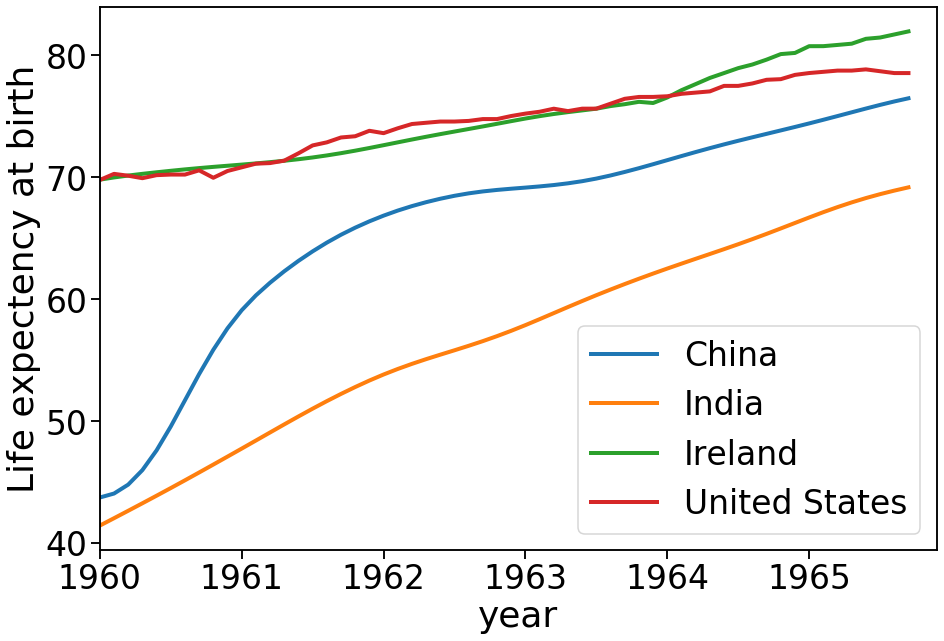

In [10]:
plot_indicator(df1c, indicator)

# Total Population
## Data from: http://data.worldbank.org/indicator/SP.POP.TOTL

In [11]:
indicator = 'SP.POP.TOTL' if DOWNLOAD_DATA else 'API_SP.POP.TOTL_DS2_en_csv_v2_713131'
df2 = get_worldbank_dataframe(indicator)
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


In [12]:
indicator = 'Total population'
df2r = rearrange_dataframe(df2, indicator)
df2r.sort_index(ascending=True, inplace=True)
df2c = df2r.loc[(slice(None), countries),:]
df2c.head()

Total population
year Country Name                   
1960 China               667070000.0
     India               450547679.0
     Ireland               2828600.0
     United States       180671000.0
1961 China               660330000.0

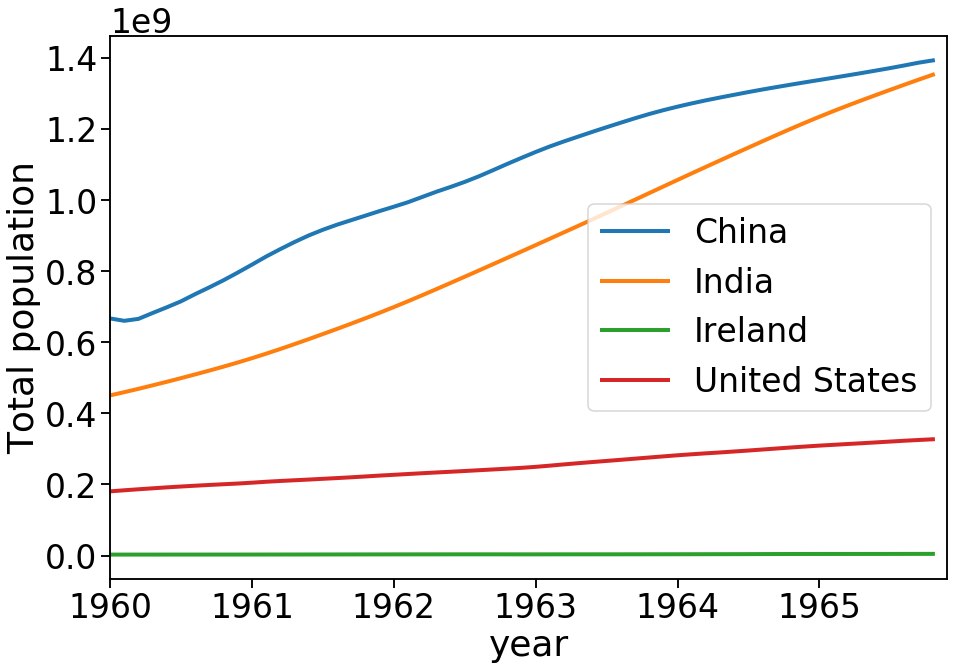

In [14]:
plot_indicator(df2c, indicator)

# GDP per Capita
Data from: http://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv

In [15]:
indicator = 'NY.GDP.PCAP.CD' if DOWNLOAD_DATA else 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_713080'
df3 = get_worldbank_dataframe(indicator)
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.993281,24713.698045,25025.099563,25533.569780,25796.380251,25239.600411,25630.266492,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,591.162346,641.872034,637.165044,613.856333,578.466353,547.228110,556.302139,520.896603,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4437.178067,4247.614279,4413.081743,4578.666720,3952.829458,4124.108907,4532.890162,5268.848504,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,41100.729938,38392.943901,40626.751632,42300.334128,36039.653496,37224.108916,39134.393371,42029.762737,NaN,NaN


In [16]:
indicator = 'GDP per capita'
df3r = rearrange_dataframe(df3, indicator)
df3r.sort_index(ascending=True, inplace=True)
df3c = df3r.loc[(slice(None), countries),:]
df3c.head()

GDP per capita
year Country Name                 
1960 China               89.520542
     India               82.188602
     Ireland            685.614712
     United States     3007.123445
1961 China               75.805838

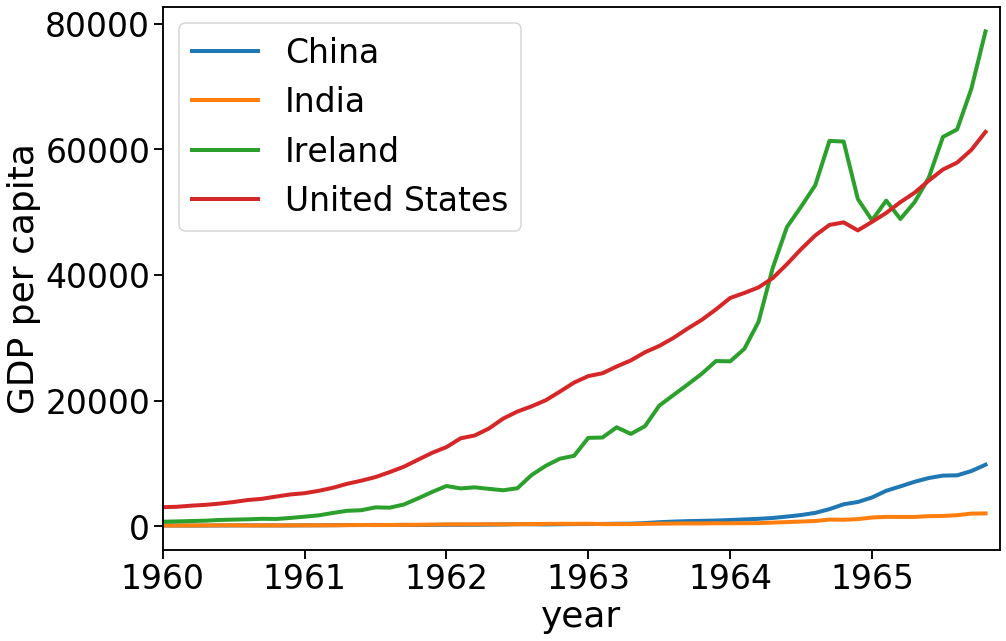

In [17]:
plot_indicator(df3c, indicator)

In [18]:
df4 = df1c.merge(df2c, left_index=True, right_index=True).merge(df3c, left_index=True, right_index=True)
df4.head()

Life expectency at birth  Total population  GDP per capita
year Country Name                                                             
1960 China                         43.725000       667070000.0       89.520542
     India                         41.422000       450547679.0       82.188602
     Ireland                       69.796512         2828600.0      685.614712
     United States                 69.770732       180671000.0     3007.123445
1961 China                         44.051000       660330000.0       75.805838

Text(0.5, 1.0, '1980')

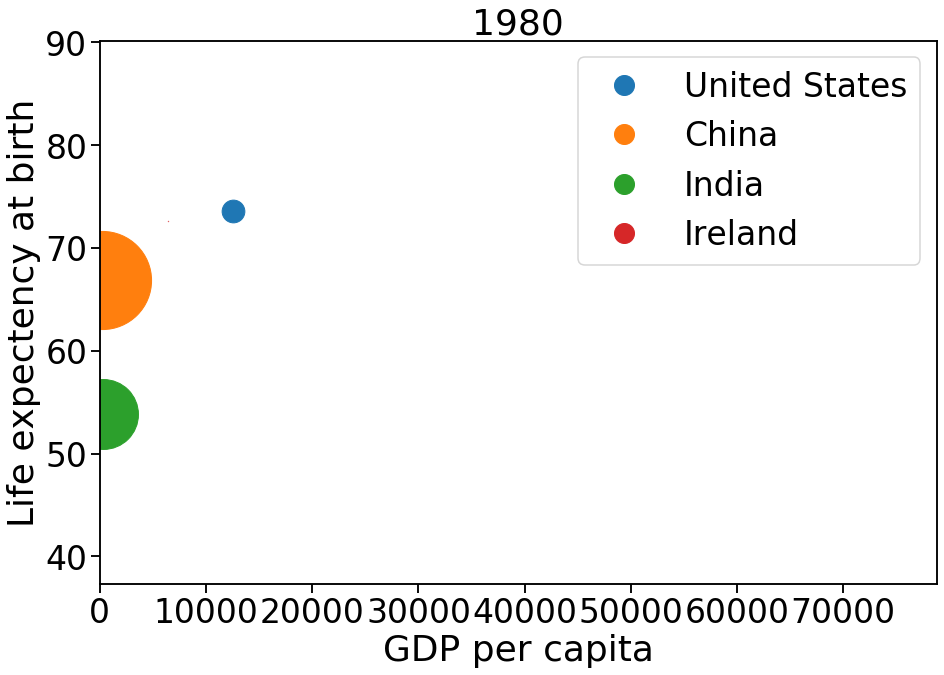

In [20]:
x = 'GDP per capita'
y = 'Life expectency at birth'
s = 'Total population'

fig, ax = plt.subplots(figsize=[15 ,10])
for c in countries:
    g = df4.loc['1980', c]
    ax.plot(g[x], g[y], marker='o', linestyle='', ms=g[s] / 1e7, label=c)
lgnd = ax.legend()
for i in range(len(countries)):
    lgnd.legendHandles[i]._legmarker.set_markersize(20)
ax.set_xlabel(x)
ax.set_ylabel(y)

ax.set_xlim([0, df4[x].max()])
ax.set_ylim([df4[y].min()*0.9, df4[y].max()*1.1])
ax.set_title('1980')

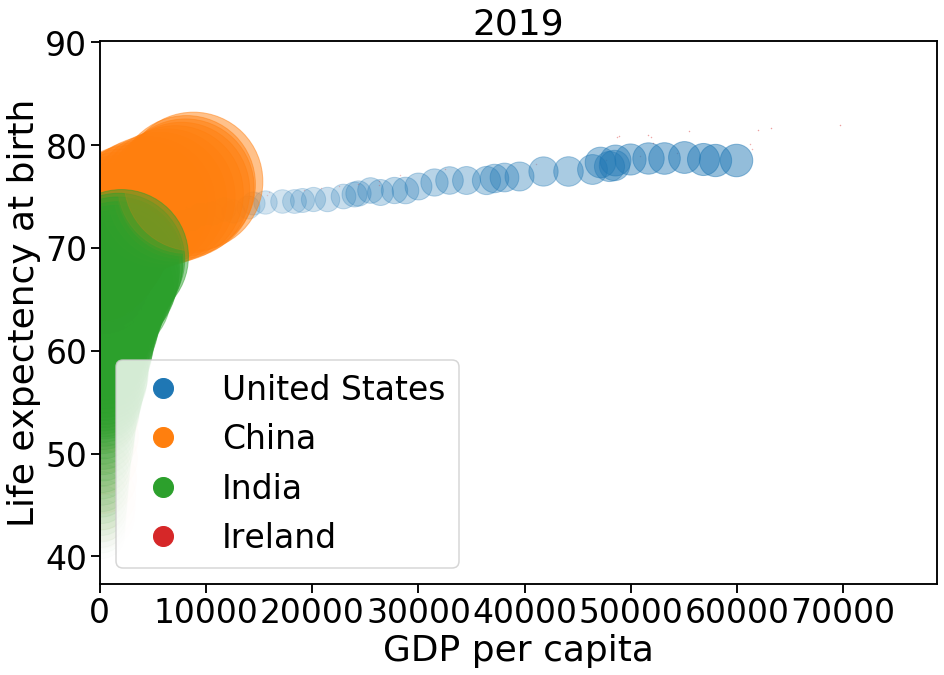

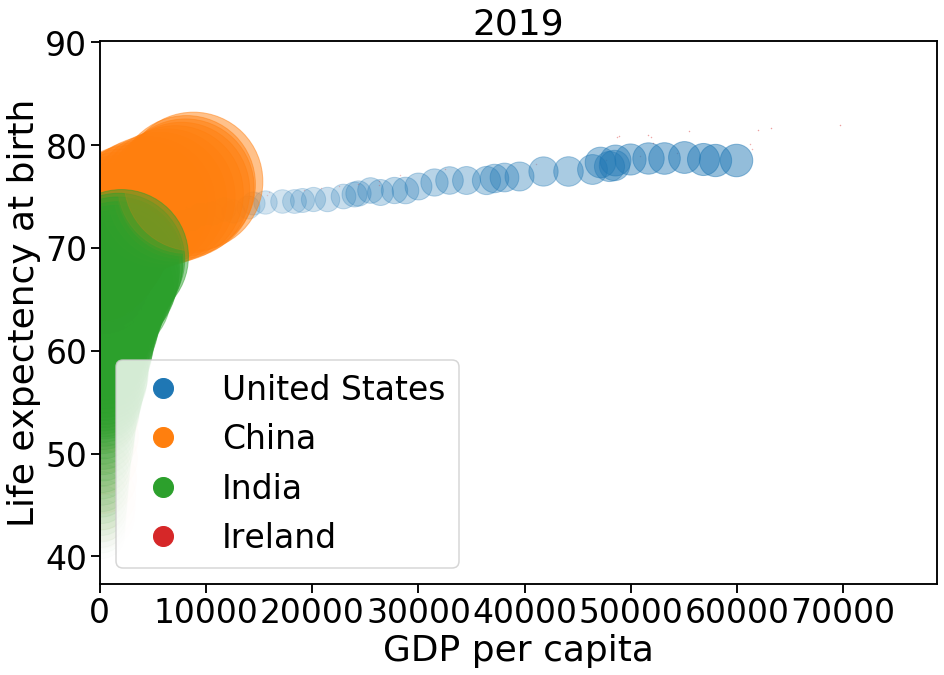

In [21]:
def wb_scatter(df, year):
    current_palette = sns.color_palette()
    rng = float(df.index.levels[0].max()) - float(df.index.levels[0].min())
    cur = float(year) - float(df.index.levels[0].min())
    alpha = (cur / rng) / 2
    for i, c in enumerate(countries):
        g = df.loc[year, c]
        ax.plot(g[x], g[y], marker='o', linestyle='', color=current_palette[i], ms=g[s] / 1e7, label=c, alpha=alpha)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_xlim([0, df[x].max()])
    ax.set_ylim([df[y].min()*0.9, df[y].max()*1.1])
    ax.set_title(year)

# Animated version
fig, ax = plt.subplots(figsize=[15 ,10])

do_legend = True

for year in df4.index.levels[0].values:
    wb_scatter(df4, year)

    if do_legend:
        lgnd = ax.legend()
        for i in range(len(countries)):
            lgnd.legendHandles[i]._legmarker.set_markersize(20)
            lgnd.legendHandles[i]._legmarker.set_alpha(1.0)
        do_legend = False

    display.clear_output(wait=True)
    display.display(plt.gcf())
    sleep(0.01)

## Some other things to try:
* Different sets of countries
* Group countries into continents
* Curve fitting (e.g. using Gaussian Processes) to the trajectories
* Combine with other worldbank datasets
* Combine with other external datasets